In [607]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [608]:
car_df = pd.read_csv('/aiffel/data/cars.csv')

In [609]:
brand_df = pd.read_csv('/aiffel/data/brand.csv')

In [610]:
car_df.head(5)

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN


In [611]:
car_df.info()   #이전소유주, 엔진, 문, 좌석, 배출가스 기준, 수리 경력 결측치 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3687 entries, 0 to 3686
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3687 non-null   object 
 1   Price              3687 non-null   int64  
 2   Mileage(miles)     3687 non-null   int64  
 3   Registration_Year  3687 non-null   int64  
 4   Previous Owners    2276 non-null   float64
 5   Fuel type          3687 non-null   object 
 6   Body type          3687 non-null   object 
 7   Engine             3642 non-null   object 
 8   Gearbox            3687 non-null   object 
 9   Doors              3662 non-null   float64
 10  Seats              3652 non-null   float64
 11  Emission Class     3600 non-null   object 
 12  Service history    540 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 374.6+ KB


In [612]:
car_df.describe()

,Price,Mileage(miles),Registration_Year,Previous Owners,Doors,Seats
count,3687.000000,3.687000e+03,3687.000000,2276.000000,3662.000000,3652.000000
mean,5787.301058,8.132854e+04,2011.846216,2.807557,4.321409,4.900329
std,4480.629885,3.941718e+04,5.082387,1.546028,0.986760,0.577046
min,400.000000,1.000000e+00,1953.000000,1.000000,2.000000,2.000000
25%,2490.000000,5.698400e+04,2008.000000,2.000000,3.000000,5.000000
50%,4000.000000,8.000000e+04,2012.000000,3.000000,5.000000,5.000000
75%,7995.000000,1.030000e+05,2015.500000,4.000000,5.000000,5.000000
max,33900.000000,1.110100e+06,2025.000000,9.000000,5.000000,7.000000


In [613]:
brand_df.head(5) #브랜드 명이 소문자로 되어있음을 확인

,title,country
0,skoda,Czech Republic
1,vauxhall,United Kingdom
2,hyundai,South Korea
3,mini,United Kingdom
4,ford,United States


In [614]:
brand_df.info() #따로 결측치는 없음 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    48 non-null     object
 1   country  48 non-null     object
dtypes: object(2)
memory usage: 896.0+ bytes


## 데이터병합

In [615]:
car_df['brand'] = car_df['title'].str.split(n=1).str[0].str.upper()  #앞의 띄어쓰기 전까지가 브랜드명이므로 -> 추출

In [616]:
brand_df['title'] = brand_df['title'].str.upper()  #대문자로 맞춰주기

In [617]:
merged_df = pd.merge(car_df, brand_df, how='left', left_on='brand', right_on='title')

In [618]:
merged_df.head(5)

,title_x,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand,title_y,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,SKODA,SKODA,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,VAUXHALL,VAUXHALL,United Kingdom
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,HYUNDAI,HYUNDAI,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,MINI,MINI,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,VAUXHALL,VAUXHALL,United Kingdom


In [619]:
merged_df.columns

Index(['title_x', 'Price', 'Mileage(miles)', 'Registration_Year',
       'Previous Owners', 'Fuel type', 'Body type', 'Engine', 'Gearbox',
       'Doors', 'Seats', 'Emission Class', 'Service history', 'brand',
       'title_y', 'country'],
      dtype='object')

In [620]:
merged_df.rename(columns={'title_x': 'car_title', 'country': 'brand_country'}, inplace=True)
  #불필요한 것 제거 , 이름 재조정

In [621]:
merged_df.drop(columns=['title_y'], inplace=True)

In [622]:
merged_df

,car_title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand,brand_country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,SKODA,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,VAUXHALL,United Kingdom
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,HYUNDAI,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,MINI,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,VAUXHALL,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,RENAULT MEGANE,1395,76202,2006,4.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN,RENAULT,France
3683,AUDI A4,6990,119000,2012,NaN,Petrol,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN,AUDI,Germany
3684,BMW 3 SERIES,3995,139000,2013,NaN,Diesel,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN,BMW,Germany
3685,HONDA ACCORD,1390,179190,2007,NaN,Diesel,Estate,2.2L,Manual,5.0,5.0,Euro 4,Full,HONDA,Japan


## 카테고리형 변수를 숫자 형태로 변환하기

In [623]:
merged_df['Engine'].describe()

count     3642
unique      34
top       1.6L
freq       736
Name: Engine, dtype: object

In [624]:
merged_df['Emission Class'].describe()

count       3600
unique         6
top       Euro 5
freq        1257
Name: Emission Class, dtype: object

In [625]:
merged_df['Engine'] = merged_df['Engine'].str.split('L').str[0].astype(float)

In [626]:
merged_df['Emission Class'] = merged_df['Emission Class'].str.split(' ').str[1].astype(float)
# 배출가스 등급은 0-6까지 있고 6으로 갈수록 질소 산화물의 배출량이 줄고 친환경적이라는 뜻

In [627]:
merged_df['Engine'].describe()

count    3642.000000
mean        1.606260
std         0.486584
min         0.800000
25%         1.300000
50%         1.600000
75%         1.900000
max         6.300000
Name: Engine, dtype: float64

In [628]:
merged_df['Emission Class'].describe()

count    3600.000000
mean        4.910000
std         0.910688
min         1.000000
25%         4.000000
50%         5.000000
75%         6.000000
max         6.000000
Name: Emission Class, dtype: float64

## 결측치 처리하기

In [629]:
merged_df

,car_title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand,brand_country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6.0,NaN,SKODA,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2,Manual,3.0,5.0,4.0,Full,VAUXHALL,United Kingdom
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4,Manual,5.0,5.0,5.0,NaN,HYUNDAI,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4,Manual,3.0,4.0,4.0,Full,MINI,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3,Manual,5.0,5.0,5.0,NaN,VAUXHALL,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,RENAULT MEGANE,1395,76202,2006,4.0,Petrol,Hatchback,1.6,Manual,5.0,5.0,4.0,NaN,RENAULT,France
3683,AUDI A4,6990,119000,2012,NaN,Petrol,Saloon,2.0,Manual,4.0,5.0,5.0,NaN,AUDI,Germany
3684,BMW 3 SERIES,3995,139000,2013,NaN,Diesel,Saloon,2.0,Manual,4.0,5.0,5.0,NaN,BMW,Germany
3685,HONDA ACCORD,1390,179190,2007,NaN,Diesel,Estate,2.2,Manual,5.0,5.0,4.0,Full,HONDA,Japan


In [630]:
merged_df['Service history'] = merged_df['Service history'].fillna('Unknown')

In [631]:
merged_df.isnull().sum()

car_title               0
Price                   0
Mileage(miles)          0
Registration_Year       0
Previous Owners      1411
Fuel type               0
Body type               0
Engine                 45
Gearbox                 0
Doors                  25
Seats                  35
Emission Class         87
Service history         0
brand                   0
brand_country           0
dtype: int64

In [632]:
merged_df.isnull().mean()

car_title            0.000000
Price                0.000000
Mileage(miles)       0.000000
Registration_Year    0.000000
Previous Owners      0.382696
Fuel type            0.000000
Body type            0.000000
Engine               0.012205
Gearbox              0.000000
Doors                0.006781
Seats                0.009493
Emission Class       0.023596
Service history      0.000000
brand                0.000000
brand_country        0.000000
dtype: float64

In [633]:
merged_df['Previous Owners'].fillna(merged_df['Previous Owners'].median(), inplace=True) #이상치에 영향 안받게 중앙값으로 채워넣음

In [634]:
merged_df = merged_df[merged_df.isnull().sum(axis=1) < 2] 

In [635]:
merged_df

,car_title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand,brand_country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6.0,Unknown,SKODA,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2,Manual,3.0,5.0,4.0,Full,VAUXHALL,United Kingdom
2,HYUNDAI I30,949,137000,2011,3.0,Petrol,Hatchback,1.4,Manual,5.0,5.0,5.0,Unknown,HYUNDAI,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4,Manual,3.0,4.0,4.0,Full,MINI,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,3.0,Diesel,Hatchback,1.3,Manual,5.0,5.0,5.0,Unknown,VAUXHALL,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,RENAULT MEGANE,1395,76202,2006,4.0,Petrol,Hatchback,1.6,Manual,5.0,5.0,4.0,Unknown,RENAULT,France
3683,AUDI A4,6990,119000,2012,3.0,Petrol,Saloon,2.0,Manual,4.0,5.0,5.0,Unknown,AUDI,Germany
3684,BMW 3 SERIES,3995,139000,2013,3.0,Diesel,Saloon,2.0,Manual,4.0,5.0,5.0,Unknown,BMW,Germany
3685,HONDA ACCORD,1390,179190,2007,3.0,Diesel,Estate,2.2,Manual,5.0,5.0,4.0,Full,HONDA,Japan


이전소유주, 엔진, 문, 좌석, 배출가스 기준, 수리 경력 결측치에 결측치가 있는것을 info 메서드 통해 알 수 있다.

이전 소유주의 결측치 비율이 38%이므로 이건 오류가 발생한 부분이라고 생각했다. 이것을 모두 지우면 데이터의 변수의 성질이나 특성을 제대로 설명할 수 없다고 생각했다. 그래서 이상값에 로버스트한 중앙값을 채워 넣었다. 

1개(이전소유주) 혹은 0개의 결측치를 가진 데이터를 가지고 데이터를 분석하는 것이 올바르다고 생각하고 데이터의 행에서 결측치가 2개 미만인 행만 가져올 수 있도록 코드를 작성했다.

행에서 2개 이상의 결측치가 발생하는 경우 중고값 가격 예측이나 설명이 어려운 형태라고 생각을 하고 제거하면 약 73개 행이 사라진다.
데이터의 많은 부분을 삭제하지 않고 특성을 어느정도 반영한다고 생각해서 결측치가 2개 이상일 경우 제거하는 것으로 작성했다.

## Scaler 활용해보기

In [636]:
from sklearn.preprocessing import StandardScaler

In [637]:
ss = StandardScaler()

중고차 가격 예측 모델을 산정할려고 할 때 필요할 변수들을 생각해보면,  
- 'Mileage(miles)' :주행거리 
- 'Registration_Year': 차량 연식 
- 'Previous Owners' : 이전 소유주
- 'Doors' : 차량의 타입, 목적  (중고차 특성에 따른 클러스터링에도 필요할 것이라고 생각)
- 'Seats' : 차량의 용량,용도, 가족차를 구할때 고려 (중고차 특성에 따른 클러스터링에도 필요할 것이라고 생각)
- 'Engine': 엔진 크기에 따른 차량의 성능과 효율성
- 'Emission Class':배출 규제 등급, 차량의 환경적 성능
- 'Service history': 정기적인 서비스 이력, 서비스 관리를 잘 받으면 중고차 가격이 높고 아니면 낮을 것

- 'Previous Owners'는 결측치가 너무 많아서 제외
- doors 와 seats는 서로 상관관계가 있어서 제외(문이 많으면 좌석이 당연히 많기 때문), 다중 공선성 문제 
- Service history 는 정기적인 서비스 이력인데 이것이 고장이 났지만 수리를 안했을지, 고장이 없고 성능이 좋아서 정기 서비스를 안받았는지 알 수 가 없기 떄문에 제외 
- 'Fuel type', 'Body type', 'Gearbox' : 영향이 분명 없지 않겠지만, 중복된 변수 혹은 다른 변수와의 상관관계가 높은 변수일 수도 있고 다중공선성 문제가 있을 수도 있어서 제외

결론 : 주행거리, 차량 연식, 엔진, 배출 규제 등급의 변수만 가지고 스케일링 하는것이 성능 향상과 오류를 줄이는데 좋을 것이라도 판단.

In [638]:
categorical_cols = ['Fuel type', 'Body type', 'Gearbox', 'Service history']
merged_df = pd.get_dummies(merged_df, columns=categorical_cols, drop_first=True) # 원핫인코딩으로 수치형 변수 변환

In [639]:
numeric_cols = ['Price', 'Mileage(miles)', 'Registration_Year', 'Engine', 'Emission Class']


In [640]:
merged_df[numeric_cols] = ss.fit_transform(merged_df[numeric_cols])

In [641]:
merged_df

,car_title,Price,Mileage(miles),Registration_Year,Previous Owners,Engine,Doors,Seats,Emission Class,brand,...,Body type_Convertible,Body type_Coupe,Body type_Estate,Body type_Hatchback,Body type_MPV,Body type_Pickup,Body type_SUV,Body type_Saloon,Gearbox_Manual,Service history_Unknown
0,SKODA FABIA,0.246552,-0.287007,0.848924,3.0,-0.420339,5.0,5.0,1.197064,SKODA,...,0,0,0,1,0,0,0,0,1,1
1,VAUXHALL CORSA,-0.953212,0.178547,-0.815308,4.0,-0.832353,3.0,5.0,-0.999383,VAUXHALL,...,0,0,0,1,0,0,0,0,1,0
2,HYUNDAI I30,-1.074409,1.403804,-0.191221,3.0,-0.420339,5.0,5.0,0.098840,HYUNDAI,...,0,0,0,1,0,0,0,0,1,1
3,MINI HATCH,-0.753436,0.384701,-0.399250,5.0,-0.420339,3.0,4.0,-0.999383,MINI,...,0,0,0,1,0,0,0,0,1,0
4,VAUXHALL CORSA,-1.063088,0.087820,0.224837,3.0,-0.626346,5.0,5.0,0.098840,VAUXHALL,...,0,0,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,RENAULT MEGANE,-0.975409,-0.134834,-1.231366,4.0,-0.008325,5.0,5.0,-0.999383,RENAULT,...,0,0,0,1,0,0,0,0,1,1
3683,AUDI A4,0.266529,0.948271,0.016808,3.0,0.815704,4.0,5.0,0.098840,AUDI,...,0,0,0,0,0,0,0,1,1,1
3684,BMW 3 SERIES,-0.398279,1.454418,0.224837,3.0,0.815704,4.0,5.0,0.098840,BMW,...,0,0,0,0,0,0,0,1,1,1
3685,HONDA ACCORD,-0.976519,2.471522,-1.023337,3.0,1.227718,5.0,5.0,-0.999383,HONDA,...,0,0,1,0,0,0,0,0,1,0


   ## 주성분분석

In [642]:
from sklearn.decomposition import PCA

In [643]:
merged_df_copy = merged_df.copy()

In [644]:
merged_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3614 entries, 0 to 3686
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   car_title                        3614 non-null   object 
 1   Price                            3614 non-null   float64
 2   Mileage(miles)                   3614 non-null   float64
 3   Registration_Year                3614 non-null   float64
 4   Previous Owners                  3614 non-null   float64
 5   Engine                           3613 non-null   float64
 6   Doors                            3614 non-null   float64
 7   Seats                            3608 non-null   float64
 8   Emission Class                   3600 non-null   float64
 9   brand                            3614 non-null   object 
 10  brand_country                    3614 non-null   object 
 11  Fuel type_Diesel Hybrid          3614 non-null   uint8  
 12  Fuel type_Petrol    

In [645]:
merged_df_numeric = merged_df_copy.drop(columns=['car_title', 'brand', 'brand_country'])

In [646]:
merged_df_numeric.fillna(0, inplace=True)

In [647]:
merged_df_numeric_scaled = ss.fit_transform(merged_df_numeric)

In [648]:
pca = PCA()

In [649]:
pca.fit(merged_df_numeric_scaled)

PCA()

In [650]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

In [651]:
num_components = np.argmax(cumulative_variance >= 0.70) + 1

In [652]:
print(f"70% 이상의 분산을 설명하는 데 필요한 주성분 수: {num_components}")

70% 이상의 분산을 설명하는 데 필요한 주성분 수: 10


## 국가별 총 브랜드 개수

In [653]:
merged_df.groupby('brand_country')['brand'].count().reset_index()

,brand_country,brand
0,Czech Republic,63
1,France,520
2,Germany,851
3,Italy,127
4,Japan,596
5,Malaysia,3
6,Romania,14
7,South Korea,178
8,Spain,59
9,Sweden,46


## 상관관계

In [654]:
merged_df.corr()

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine,Doors,Seats,Emission Class,Fuel type_Diesel Hybrid,Fuel type_Petrol,...,Body type_Convertible,Body type_Coupe,Body type_Estate,Body type_Hatchback,Body type_MPV,Body type_Pickup,Body type_SUV,Body type_Saloon,Gearbox_Manual,Service history_Unknown
Price,1.000000,-0.502471,0.775019,-0.405390,-0.025995,0.113721,-0.025221,0.697992,0.064370,-0.141761,...,-0.056427,0.115920,-0.015679,-0.203899,-0.079972,0.047792,0.254212,0.067493,-0.203591,-0.140624
Mileage(miles),-0.502471,1.000000,-0.442341,0.267262,0.333845,-0.035432,0.094189,-0.378377,-0.018835,-0.202528,...,0.015674,0.001878,0.144229,-0.111863,0.052201,0.017159,-0.070402,0.112986,-0.116318,0.084275
Registration_Year,0.775019,-0.442341,1.000000,-0.415802,-0.299114,0.217317,0.027103,0.920095,0.027967,-0.136506,...,-0.125349,-0.017245,0.006445,0.009882,-0.053163,0.026468,0.175477,-0.099911,0.089072,-0.136096
Previous Owners,-0.405390,0.267262,-0.415802,1.000000,0.147406,-0.124445,-0.027181,-0.379480,-0.025514,0.040274,...,0.054582,0.033705,0.039969,-0.003070,-0.000884,0.002838,-0.097392,0.034815,-0.011463,0.199063
Engine,-0.025995,0.333845,-0.299114,0.147406,1.000000,-0.063196,0.073711,-0.264197,0.013572,-0.376433,...,0.087415,0.191282,0.097000,-0.500704,0.048978,0.045290,0.146125,0.375668,-0.476083,-0.011123
Doors,0.113721,-0.035432,0.217317,-0.124445,-0.063196,1.000000,0.496923,0.181788,-0.005343,-0.172729,...,-0.405993,-0.421066,0.152528,0.068748,0.144249,0.000465,0.258441,-0.106168,0.074351,-0.045607
Seats,-0.025221,0.094189,0.027103,-0.027181,0.073711,0.496923,1.000000,0.022541,0.002895,-0.216242,...,-0.386255,-0.259271,0.031582,-0.111868,0.432052,0.005015,0.175911,0.052690,-0.002653,-0.029408
Emission Class,0.697992,-0.378377,0.920095,-0.379480,-0.264197,0.181788,0.022541,1.000000,0.019954,-0.167015,...,-0.103691,0.000097,0.021800,0.007807,-0.040993,0.023999,0.133821,-0.091325,0.086760,-0.109054
Fuel type_Diesel Hybrid,0.064370,-0.018835,0.027967,-0.025514,0.013572,-0.005343,0.002895,0.019954,1.000000,-0.022438,...,-0.002892,-0.003290,-0.003673,-0.021155,-0.003474,-0.000480,-0.006346,0.050329,-0.032239,0.006942
Fuel type_Petrol,-0.141761,-0.202528,-0.136506,0.040274,-0.376433,-0.172729,-0.216242,-0.167015,-0.022438,1.000000,...,0.067187,-0.038768,-0.193407,0.340550,-0.113986,-0.038875,-0.139261,-0.193527,0.170878,-0.021376


- 중고차의 사용연수 배출규제등급이 가격이 밀접하게 상관되어있고, 연료타입과 바디타입도 엔진도 밀접하게 상관되어 있는 것을 알 수 있다.
- 변수 등이 많아 시각화를 하면 아래의 그림과 같다. 

In [655]:
correlation_matrix = merged_df[numeric_cols].corr()

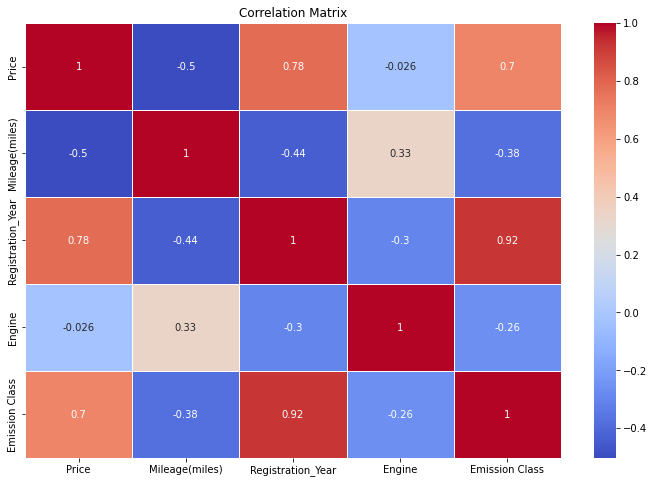

In [656]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# 회고

## 오류 코드:

def extract_brand(title, brands):
    for brand in brands:
        if brand in title:
            return brand
    return 'unknown'

brands = brand_df['title'].unique()
car_df['brand'] = car_df['title'].apply(lambda x: extract_brand(x, brands))

처음에 데이터 병합을 할 때, 함수를 만들어서 car의 title을 brand의 타이틀을 리스트로 만들어서 하나씩 집어넣어 그 안에 브랜드가 존재하면
브랜드를 추출하는 함수를 만들어서 코드를 작성했다. 팀원들과 설명을 하는데, 브랜드 뒤에 제품명이 바로 오지 않고, brand_df의 브랜드를 중복을 제거하여 두개가 맞지 않을 수 있으며 문자열로 in을 사용하여 우연이라도 중간에 섞여서 들어가 있으면 오류가 생길 수도 있는데 더 세부적으로 작성하기엔 시간 관계상 어려워서 코드를 바꿨다. (EX) MINI2, MINI는 다른거지만 저 코드에선 같은 것으로 취급할 것이기 때문


## 코드 피드백 :

윤희님 코드

car_df['brand', 'title'] = car_df['title'].str.split('', n= 1, expand = True).str.upper()
정확하게 코드를 적은것은 아님. 작동방식의 차이가 남

내 코드 

car_df['brand'] = car_df['title'].str.split(n=1).str[0].str.upper() 


윤희님 코드 : car_df에 'brand'열을 새로 만들고 title의 내용을 n+1개인 두 부분으로 나누어 각각 브랜드와 타이틀로 저장

내 코드 : 브랜드 코드를 만들고 n+1개인 두 부분으로 나누어 첫번째 부분을 브랜드로 지정
후에 중복인 타이틀을 지우고 이름을 변경하는 과정을 거침

두 개를 비교해보고 장단점을 피드백 했다. 개인적으로 윤희님 코드가 바로 열을 생성해서 더 좋은 것 같았다.


## 어려웠던 점:

결측치 처리를 하는데 있어 이전 소유주의 결측치 비율이 매우 높아서 어떻게 처리해야할 지 고민을 했다. LMS의 힌트를 읽고
행에서 결측치를 처리하는 방식으로 했고 팀원 분들과도 설명을 드렸는데 이게 맞을지는 잘 모르겠다.

또한

스케일링 부분에서 범주형 변수를 수치형 변수로 고치고, 목표로 햇던 중고차 가격 예측 모델에 필요한 변수를 선정하고 스케일링 하는 과정이
쉽지 않았다. 배운 것을 사용해서 최대한 변수를 고쳤는데, PCA분석을 할때 변수가 범주형이면 분석이 안되서 에러가 발생해서 데이터 정제를 더 한 수에 PCA 분석을 진행했다.

상관분석을 할 떄에도 원핫인코딩으로 한 부분이 모두 나와서 가시성이 좋지 않아서 고민을 많이 했다. 내가 잘하고 있는지에 대한 고민을 많이 한것 같다. 


## 느낀점:

데이터를 정제하는데 있어서 이상과 현실의 괴리감이 느껴졌다. 머리속으로 이러이러한 변수로 배제를 하고, 딱 주성분 분석과 상관관계를 찾아서
가격에 영향을 주는 종속 변수는 무엇무엇이다라고 찾을 수 있을 줄 알았는데, 막상 데이터를 손대보니 이상치, 결측치등 고려해야할 것이 많았고
깔끔하게 정제를 하는 것과 이것을 모델링 하여 가격 예측을 하는 실제 모델에 적용하는 데이터 정제는 조금 다른 것 같다는 생각을 했다. 

